In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import os
import glob
import re
import seaborn as sns
from tqdm.notebook import tqdm
from scipy.stats import pearsonr
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from transformers import TFBertForSequenceClassification, BertTokenizer, AutoTokenizer, TFAutoModelForSequenceClassification
import tensorflow as tf

import sys
sys.path.append("..")
import utils.utils as utils
import utils.postprocessing_utils as post_utils
from data_preparation.data_preparation_sentiment import Example, convert_examples_to_tf_dataset, make_batches

#<img src="attachment:image.png" width="300" height="300" align="left">
"""
<hr>
<a id=""></a>

[Back to contents](#index)
""";

<a id="index"></a>

[A.1. Average Length vs Mean F1 Over Language](#A1)

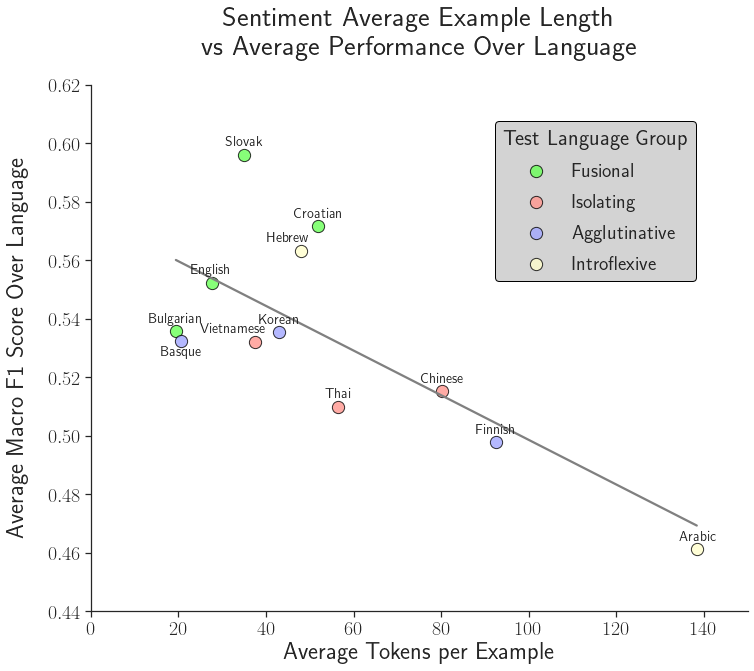

In [7]:
sns.set()
sns.set_style("ticks")
plt.rc("xtick", labelsize=16)
plt.rc("ytick", labelsize=16)
plt.rc("axes", labelsize=16)
plt.rcParams["text.usetex"] = True

<hr>
<a id="A1"></a>

[Back to contents](#index)

### A.1. Average Length vs Mean F1 Over Language

In [2]:
df = pd.read_excel("../results/sentiment_within_cross_f1.xlsx")

In [3]:
basic_stats = pd.read_excel("../data_exploration/sentiment_basic_stats.xlsx")

In [5]:
df = pd.merge(df, basic_stats[["language", "test_avg_tokens"]], how="left", left_on="Language", right_on="language")

In [36]:
x = df["test_avg_tokens"]
y = df["Mean-F1-Over-Language"]
print(pearsonr(x,y))

(-0.7383471928893696, 0.006102070559181158)


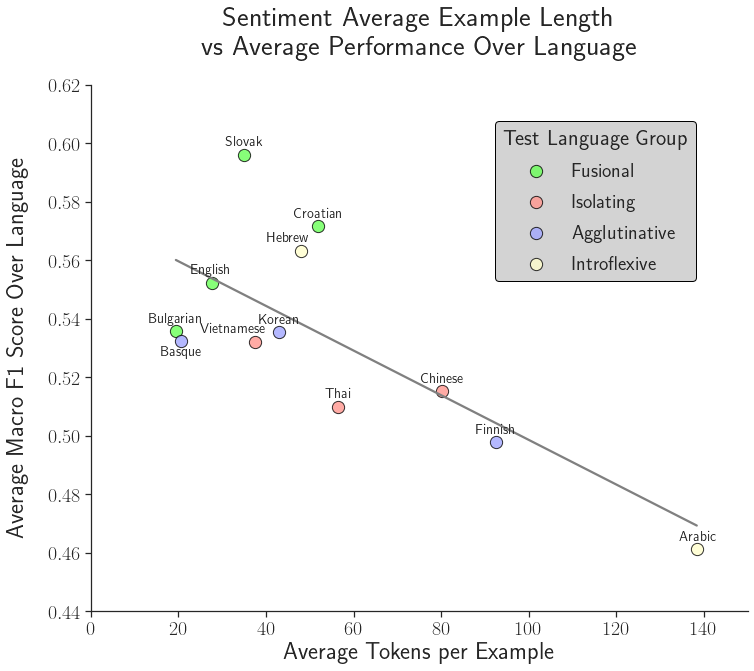

In [35]:
colors = {"Fusional": "#95c78f", 
          "Isolating": "#f79d97", 
          "Agglutinative": "#abaff5", 
          "Introflexive": "#fffecc"}
colors = {k: sns.saturate(v) for k,v in colors.items()}
extra_fontsize = 0

x = "test_avg_tokens"
y = "Mean-F1-Over-Language"
hue = "Group"
langs = "Language"
data = df
offsets = dict.fromkeys(data[langs].values, (0, 0.003))
offsets["Basque"] = (0, -0.005)
offsets["Hebrew"] = (-3, 0.003)
offsets["Vietnamese"] = (-5, 0.003)

g = sns.lmplot(x=x, y=y, data=data, hue=hue, palette=colors,
               fit_reg=False, legend=False, height=8, aspect=1.25, scatter_kws={"s": 150, "edgecolors": "black"})
sns.regplot(x=x, y=y, data=data, 
            scatter=False, color="grey", ci=None)

for i, row in data.iterrows():
    plt.text(row[x] + offsets[row[langs]][0], row[y] + offsets[row[langs]][1], row[langs], fontsize=14, 
             horizontalalignment="center")

plt.legend(title="Test Language Group", title_fontsize=22 + extra_fontsize, loc="upper left", 
           bbox_to_anchor=(0.6, 0.95), fontsize=20 + extra_fontsize, facecolor="lightgrey", 
           framealpha=1, edgecolor="black", labelspacing=0.6)

plt.ylim((0.44, 0.62))
plt.xlim((0, 150))
plt.ylabel("Average Macro F1 Score Over Language", fontsize=24 + extra_fontsize, labelpad=20)
plt.xlabel("Average Tokens per Example", fontsize=24 +  extra_fontsize)
plt.title("Sentiment Average Example Length\nvs Average Performance Over Language", fontsize=28 +  extra_fontsize, pad=30)
plt.tick_params(labelsize=20)

#plt.savefig("../results/plots/sentiment_length_vs_macro_f1_over_lang.pdf", dpi=400, bbox_inches="tight")
plt.show()
plt.close()